In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#show a lot of available dataset in sns
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [4]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Numerical Plots
* Distribution: Hist, KDE
* Bar Plot

* Count Plot
* Facet Plot: tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.
* Box Plot: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tư của chúng

* Join Plot

* Pair Plot

* Heat Map:một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều

In [5]:
sns.set_theme() # theme default

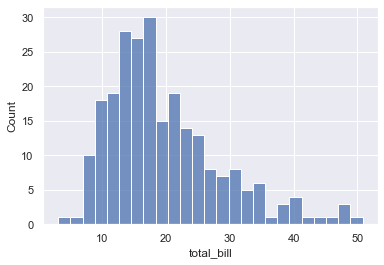

In [6]:
sns.histplot(data = df['total_bill'], bins = 25);

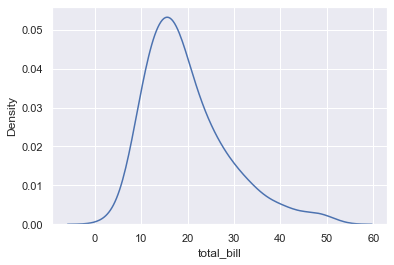

In [7]:
sns.kdeplot(data = df['total_bill']);

In [8]:
df['total_bill'].value_counts().sort_values(ascending=False)

13.42    3
10.34    2
13.81    2
7.25     2
10.33    2
        ..
11.02    1
27.28    1
11.38    1
17.07    1
26.88    1
Name: total_bill, Length: 229, dtype: int64

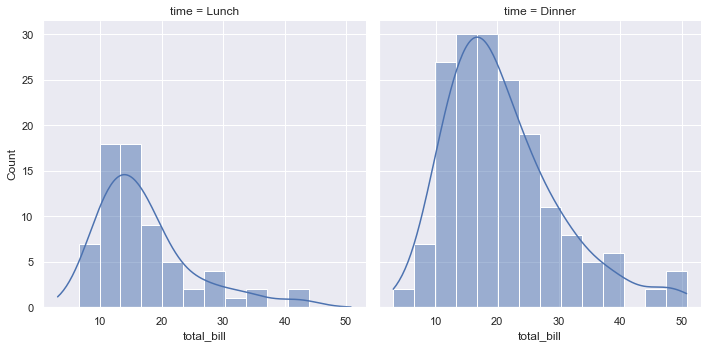

In [9]:
# Đồ thị displot kết hợp 2 đồ thị với nhau
sns.displot(data = df, x = "total_bill",col = "time",kde = True);

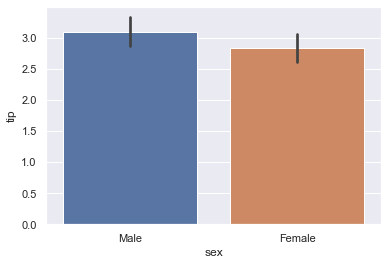

In [10]:
## Barplot
sns.barplot(data = df , x = "sex", y = "tip", estimator = np.mean);

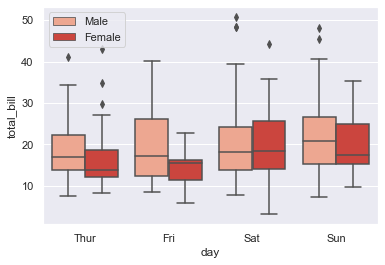

In [11]:
#Boxplot
sns.boxplot(data = df, x= 'day', y = 'total_bill',hue = 'sex',palette='Reds');
plt.legend(loc=0);

In [12]:
#Facet Gird
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


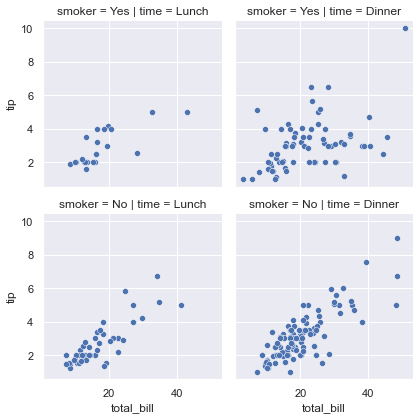

In [13]:
tip_fg = sns.FacetGrid(data = df , row = 'smoker', col = 'time');
tip_fg.map(sns.scatterplot,'total_bill', 'tip');

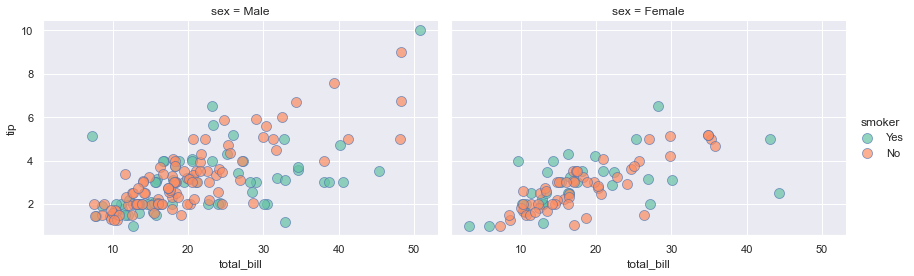

In [14]:
kws = dict(s = 100, edgecolor = 'b', alpha = .7)
new_fg = sns.FacetGrid(data = df , col = 'sex',
                       hue ='smoker', 
                       palette= 'Set2', # màu 
                       height=4,
                       aspect=1.5, # rộng
                       col_order=['Male','Female']);
new_fg.map(sns.scatterplot,'total_bill','tip',**kws);
new_fg.add_legend();

In [17]:
pg_df = sns.load_dataset('penguins')
pg_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


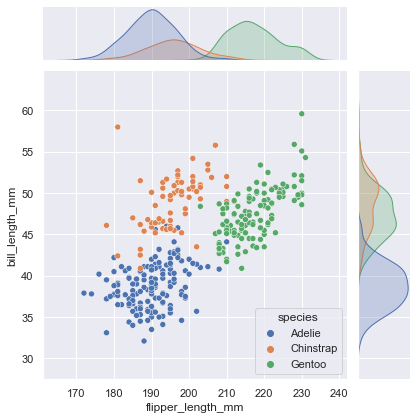

In [19]:
# joinplot
sns.jointplot(data = pg_df, x = 'flipper_length_mm', y = 'bill_length_mm',hue = 'species');

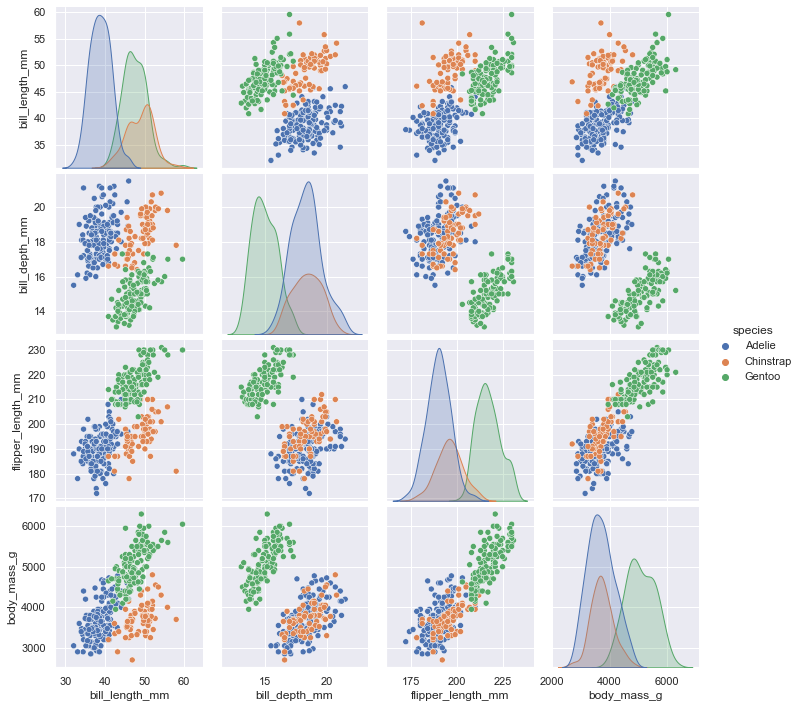

In [20]:
sns.pairplot(data = pg_df, hue = 'species');

In [21]:
## heatmap
flight_df = sns.load_dataset('flights')
flight_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [22]:
flights = pd.pivot_table(flight_df, index='month', columns='year',values ='passengers')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


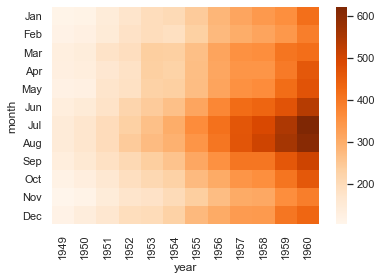

In [27]:
sns.heatmap(data = flights, cmap = 'Oranges');